In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [70]:
pca = PCA(svd_solver='auto')

In [71]:
for i in range(40):
    if i==0:
        train = pd.read_pickle('salida/nuevo4a/MultiNLI/TRAIN/TRAIN_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4a/MultiNLI/TRAIN/TRAIN_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            print(i+1)

In [72]:
train=train.reset_index(drop=True)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.000000,1.859,0.000,0.000000,0.000000,0.000000,2,0.000000,0,6,0,9,0.500000,0,,0,,0.666667,1
1,3.645738,1.496252,2.200,1.654,3.806791,0.004579,0.380384,2,0.040000,0,6,1,25,1.000000,0,,0,,0.400000,0
2,0.309457,5.802296,2.039,1.939,3.757981,0.005768,0.188705,2,0.800000,0,6,4,5,0.333333,0,,0,,0.000000,0
3,0.391021,1.368632,2.252,0.918,3.897728,0.008673,0.259838,0,0.333333,0,2,1,3,0.000000,0,,0,,0.333333,0
4,0.000000,0.000000,2.122,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,13,1.000000,0,,0,,0.333333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392697,1.315464,1.395498,2.311,1.500,3.823113,0.003372,0.525360,0,0.250000,0,4,1,4,0.750000,0,,1,do,0.666667,2
392698,0.725870,1.452539,1.977,1.555,3.873063,0.004149,0.239049,1,0.066667,0,7,1,15,0.000000,0,,0,,0.750000,1
392699,0.069435,5.832423,1.789,1.357,3.812028,0.006537,0.083108,0,0.571429,0,8,4,7,0.500000,0,,0,,0.250000,0
392700,0.423722,8.826154,1.799,1.728,3.813056,0.004664,0.213795,0,0.375000,0,7,6,16,0.285714,0,,0,,0.166667,1


In [73]:
train=train.drop(["verbH","verbT"],axis=1)

In [74]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [75]:
# RTE3
y_t=[]
for i in y_:
    if i == 0:
        y_t.append("entailment")
    elif i == 1:
        y_t.append("neutral")
    else:
        y_t.append("contradiction")

In [76]:
# scaler = preprocessing.MaxAbsScaler().fit(X)
# X_scaled = scaler.transform(X)
# X = X_scaled

In [77]:
y_.unique()

array([1, 0, 2])

In [78]:
Y_pca = pca.fit_transform(X)

In [79]:
pca_vr=pca.explained_variance_ratio_
print(pca_vr)

[7.74550830e-01 1.30556562e-01 4.98279778e-02 2.07151539e-02
 9.46841950e-03 4.96989539e-03 2.08162099e-03 1.99585899e-03
 1.39949435e-03 1.08692452e-03 1.05005143e-03 8.29744852e-04
 6.94634291e-04 6.02401889e-04 1.14436001e-04 5.58603354e-05
 1.34078381e-07]


In [80]:
def distribucion_vr(D,titulo='Distribucion de Varianzas'):
    
    d=[]
    y=0
    for x in D:
        y+=x
        d.append(y)
    
    """Areas de Graficacion y visualizacion de los datos"""
    fig,ax = plt.subplots(figsize=(8,5))
    
    pasos=range(len(D))
    datos=np.array(list(map(lambda x,y:[x,y],pasos,d)))
    ax.plot(datos[:,0],datos[:,1],
            ls='--',
            color='green',
            linewidth=1,
            label='Contribucion acumulada')
    plt.title(titulo)
    plt.xlabel('Componente')
    plt.ylabel('Proporción')
    plt.grid(True)
    ax.xaxis.grid(True, which='minor')
    ax.yaxis.grid(True, which='minor')
    ax.grid(which='major', color='gray', linestyle='-')
    ax.grid(which='minor', color='grey', linestyle='--')
    ax.legend()

    return ax

<Axes: title={'center': 'Distribucion de Varianzas'}, xlabel='Componente', ylabel='Proporción'>

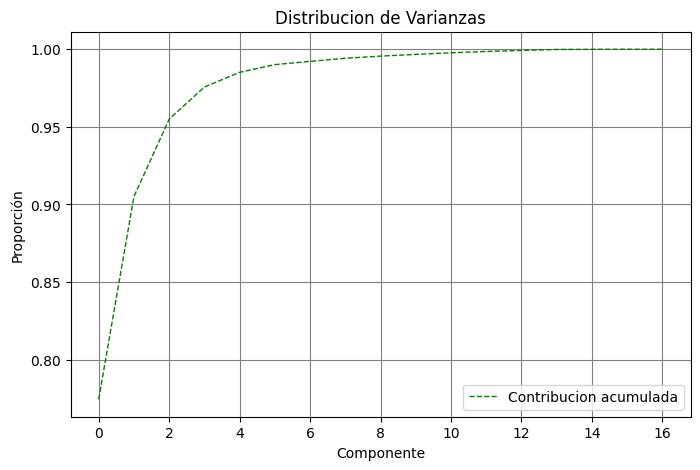

In [81]:
distribucion_vr(pca_vr)

In [15]:
pca_clases = PCA(n_components=2)

In [16]:
principalComponents=pca_clases.fit_transform(X)

In [17]:
principalComponents

array([[-1.9774124 ,  1.91214994],
       [-1.7302387 ,  3.16009165],
       [-2.50155583,  0.10708367],
       ...,
       [-5.24399426, -3.10398575],
       [-3.47910353,  3.83038266],
       [-4.14755975,  1.89427046]])

In [19]:
principal_Df = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])

# PCA vs LDA

In [91]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

In [92]:
len(y_t)

392702

In [93]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y_t).transform(X)

In [94]:
# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

explained variance ratio (first two components): [0.77455083 0.13055656]


In [95]:
len(X_r)

392702

In [96]:
len(X_r[y_ == i, 0])

130903

In [101]:
clas=['entailment','neutral','contradiction']

In [103]:
y_t

['neutral',
 'entailment',
 'entailment',
 'entailment',
 'neutral',
 'entailment',
 'neutral',
 'entailment',
 'contradiction',
 'contradiction',
 'entailment',
 'contradiction',
 'neutral',
 'neutral',
 'contradiction',
 'entailment',
 'entailment',
 'contradiction',
 'contradiction',
 'neutral',
 'entailment',
 'entailment',
 'contradiction',
 'entailment',
 'entailment',
 'neutral',
 'contradiction',
 'neutral',
 'contradiction',
 'entailment',
 'entailment',
 'entailment',
 'contradiction',
 'neutral',
 'contradiction',
 'entailment',
 'entailment',
 'contradiction',
 'contradiction',
 'contradiction',
 'entailment',
 'neutral',
 'entailment',
 'neutral',
 'entailment',
 'entailment',
 'contradiction',
 'contradiction',
 'neutral',
 'entailment',
 'entailment',
 'entailment',
 'contradiction',
 'neutral',
 'neutral',
 'neutral',
 'contradiction',
 'neutral',
 'contradiction',
 'neutral',
 'neutral',
 'entailment',
 'contradiction',
 'entailment',
 'neutral',
 'contradiction',
 'co

In [105]:
clas

['entailment', 'neutral', 'contradiction']

<Figure size 640x480 with 0 Axes>

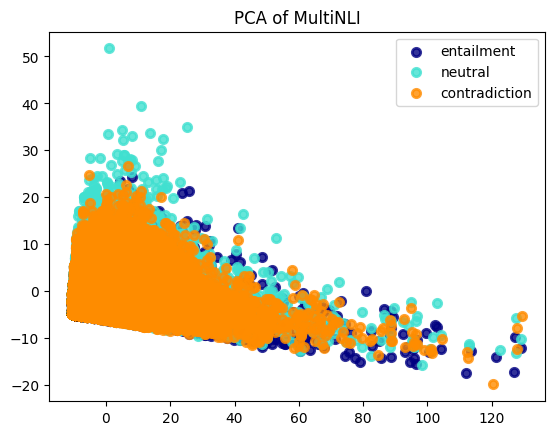

<Figure size 640x480 with 0 Axes>

In [106]:
plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2
for color, i, target_name in zip(colors, [0,1,2], clas):
    plt.scatter(
        X_r[y_ == i, 0], X_r[y_ == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of MultiNLI")

plt.figure()

ValueError: x and y must be the same size

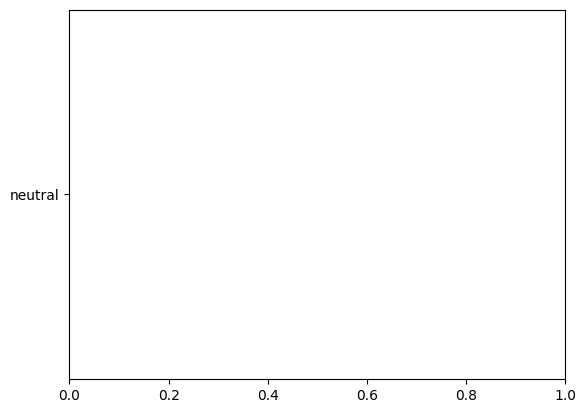

In [ ]:
plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2
for color, i, target_name in zip(colors, y_.unique(), y_.unique()):
    plt.scatter(
        X_r, y_t,color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of Mult")

plt.figure()

Text(0.5, 1.0, 'LDA of MultiNLI')

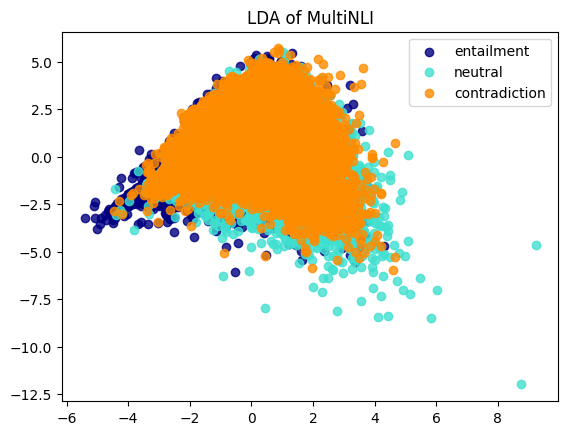

In [110]:
plt.figure()
for color, i, target_name in zip(colors, [0,1,2], clas):
    plt.scatter(
        X_r2[y_ == i, 0], X_r2[y_ == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of MultiNLI")

# Proyection 3d

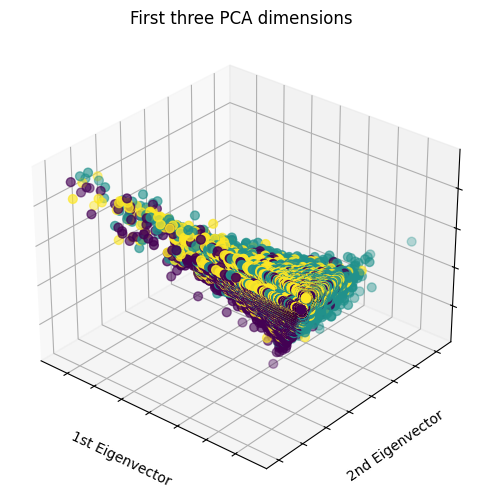

In [113]:
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=50)

X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y_,
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()